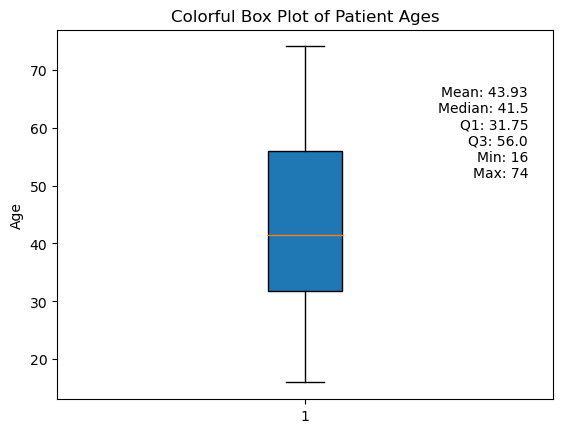

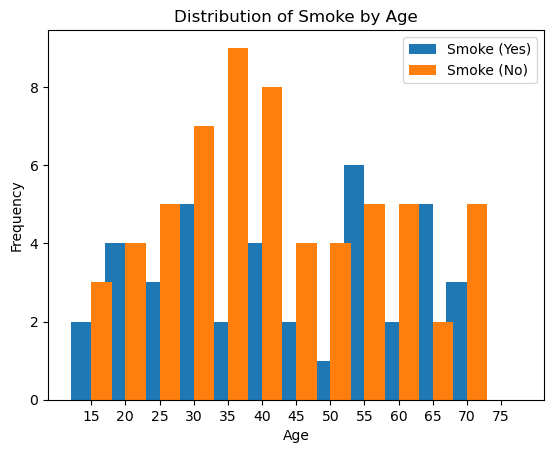

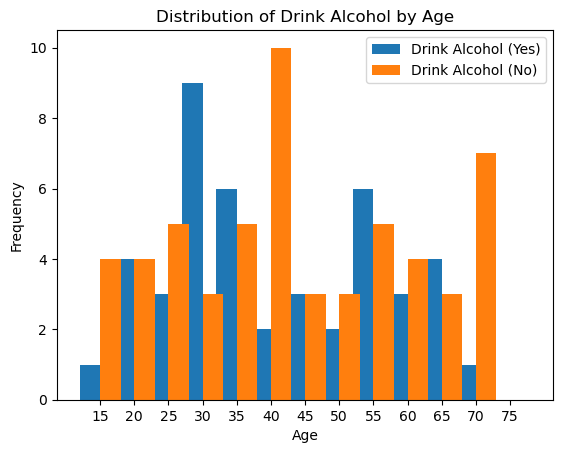

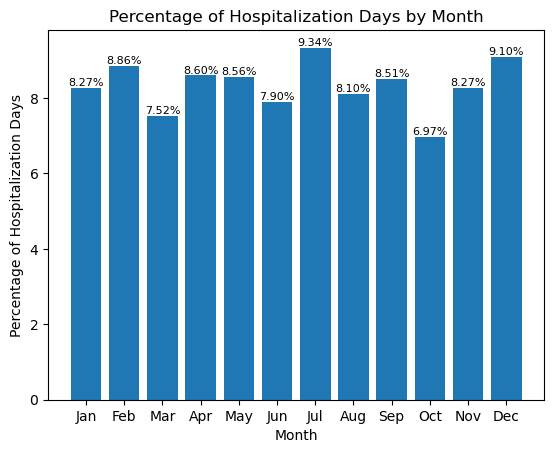

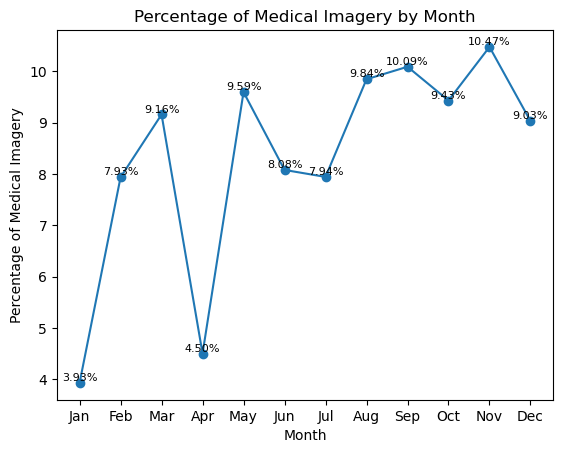

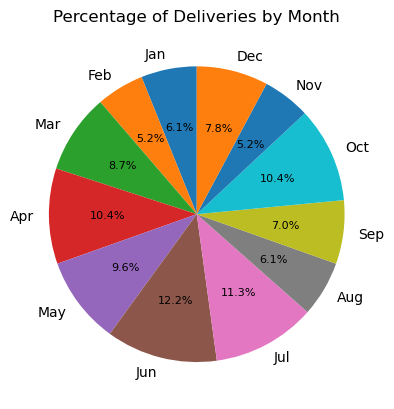

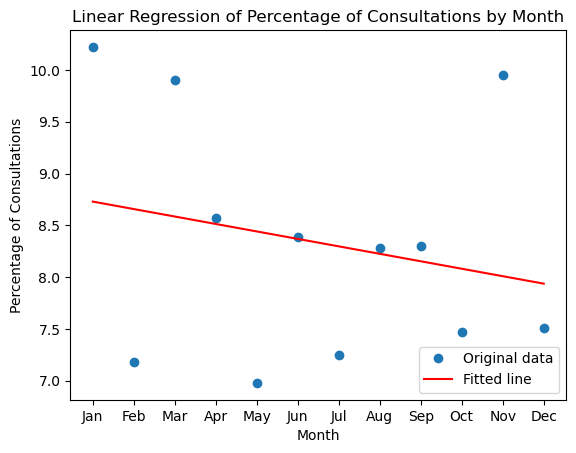

In [9]:
import tkinter as tk
from tkinter import ttk
import sqlite3
import random
import calendar
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# This Application uses a automatically generated database with patient records and a fictitious hospital activity
# The emphasis is to verify the smoking and drinking behavior of patients who visit the clinic
# Hospitalization days is measure and a linear regression of the number of consultations is also determined.
# A time series of lab test and medical imagery is kept as well as the number of deliveries conducted at this clinic.
# In summary, this was an attempt to mimic what we studied in Big Data Analytics.
# 
# Author Charles Asaah Munyah
# IST 4320, Spring 2024

def create_database():
    # Connect to SQLite database (or create it if it doesn't exist)
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Create table "patients"
    c.execute('''CREATE TABLE IF NOT EXISTS patients (
                 patientID INTEGER PRIMARY KEY,
                 age INTEGER,
                 sex TEXT CHECK (sex IN ('M', 'm', 'F', 'f')),
                 married TEXT CHECK (married IN ('Yes', 'No')),
                 smoke TEXT CHECK (smoke IN ('Yes', 'No')),
                 drinkAlcohol TEXT CHECK (drinkAlcohol IN ('Yes', 'No'))
                 )''')
    
    # Create table "activities"
    c.execute('''CREATE TABLE IF NOT EXISTS activities (
                 monthID INTEGER PRIMARY KEY,
                 NumConsult INTEGER,
                 HospDays INTEGER,
                 LabTests INTEGER,
                 MedImagery INTEGER,
                 NumDeliveries INTEGER
                 )''')
    
    # Commit changes and close connection
    conn.commit()
    conn.close()

# Call the function to create the database
create_database()

def clear_table(conn, table_name):
    """Function to delete all entries in a given table."""
    c = conn.cursor()
    c.execute(f'DELETE FROM {table_name}')
    conn.commit()

def populate_patients(conn, num_entries):
    """Function to populate the patients table with randomly generated data."""
    c = conn.cursor()
    for i in range(1, num_entries + 1):
        age = random.randint(15, 75)
        sex = random.choice(['M', 'F'])
        married = random.choice(['Y', 'N'])
        smoke = random.choice(['Y', 'N'])
        drink_alcohol = random.choice(['Y', 'N'])
        c.execute('''INSERT INTO patients (patientID, age, sex, married, smoke, drinkAlcohol)
                     VALUES (?, ?, ?, ?, ?, ?)''', (i, age, sex, married, smoke, drink_alcohol))
    conn.commit()

def populate_activities(conn):
    """Function to populate the activities table with randomly generated data."""
    c = conn.cursor()
    for month in range(1, 13):
        num_consult = random.randint(600, 900)
        hosp_days = random.randint(400, 560)
        lab_tests = random.randint(500, 1500)
        med_imagery = random.randint(500, 1500)
        num_deliveries = random.randint(6, 15)
        c.execute('''INSERT INTO activities (monthID, NumConsult, HospDays, LabTests, MedImagery, NumDeliveries)
                     VALUES (?, ?, ?, ?, ?, ?)''', (month, num_consult, hosp_days, lab_tests, med_imagery, num_deliveries))
    conn.commit()

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('HMS.db')

# Delete existing entries in patients table
clear_table(conn, 'patients')

# Populate patients table with 100 entries
populate_patients(conn, 100)

# Delete existing entries in activities table
clear_table(conn, 'activities')

# Populate activities table
populate_activities(conn)

# Close connection
conn.close()

# ***************************
# Start call out the functions
#****************************

def close_window():
    root.destroy()
   

def open_data_window():
    data_window = tk.Toplevel(root)
    data_window.title("Patient Record and Health Activities")
    data_window.geometry("500x200")

    label = tk.Label(data_window, text="Select:", font=("Helvetica", 12))  # Increase font size
    label.pack()

    options = ["View Patients Data", "View Activity Data"]
    option_menu = ttk.Combobox(data_window, values=options, width=25, font=("Helvetica", 12))  # Increase width and font size
    option_menu.pack()

    def select_option():
        selected_option = option_menu.get()
        if selected_option == "View Patients Data":
            display_patients() # Call the function to display patients in a window with a vertical scrollbar
        elif selected_option == "View Activity Data":
            display_activities() # Call the function to display activities in a window with a vertical scrollbar

    confirm_button = tk.Button(data_window, text="Confirm", command=select_option, width=25, font=("Helvetica", 12))  # Increase width and font size
    confirm_button.pack(side=tk.LEFT, padx=5, pady=10, anchor="s")  # Reduce padx

    close_button = tk.Button(data_window, text="Close", command=data_window.destroy, width=25, font=("Helvetica", 12))  # Increase width and font size
    close_button.pack(side=tk.RIGHT, padx=5, pady=10, anchor="s")  # Reduce padx

def open_reports_window():
    reports_window = tk.Toplevel(root)
    reports_window.title("Vital Statistics and Hospitalization Reports")
    reports_window.geometry("600x300")

    label = tk.Label(reports_window, text="Select Report:", font=("Helvetica", 12))  # Increase font size
    label.pack()

    options = [
        "Distribution by Sex: Smokers",
        "Distribution by Sex: Alcohol drinkers",
        "Distribution by Sex: Smokers and Alcohol drinkers",
        "Vital Statistics by Age",
        "Distribution by Age group: Smokers",
        "Distribution by Age group: Alcohol drinkers",
        "Percentage of Monthly Hospitalization Days",
        "Percentage of Monthly Lab Tests",
        "Percentage of Monthly Medical Imagery",
        "Percentage of Monthly Deliveries",
        "Consultation Regression Analysis"
    ]
    option_menu = ttk.Combobox(reports_window, values=options, width=40, font=("Helvetica", 12))  # Increase width and font size
    option_menu.pack()

    def select_report():
        selected_report = option_menu.get()
        if selected_report == "Distribution by Sex: Smokers":
            sex_smoke_distribution_percentage_window()
        elif selected_report == "Distribution by Sex: Alcohol drinkers":
            sex_drink_distribution_percentage_window()
        elif selected_report == "Distribution by Sex: Smokers and Alcohol drinkers":
            sex_smoke_drink_distribution_percentage_window()
        elif selected_report == "Vital Statistics by Age":
            create_colorful_boxplot_age()
        elif selected_report == "Distribution by Age group: Smokers":
            create_age_smoke_distribution()
        elif selected_report == "Distribution by Age group: Alcohol drinkers":
            create_age_drink_distribution()
        elif selected_report == "Percentage of Monthly Hospitalization Days":
            create_hospitalization_days_line_bar_graph()
        elif selected_report == "Percentage of Monthly Lab Tests":
            create_lab_tests_line_graph()
        elif selected_report == "Percentage of Monthly Medical Imagery":
            create_medical_imagery_line_graph()
        elif selected_report == "Percentage of Monthly Deliveries":
            create_num_deliveries_pie_chart()
        elif selected_report == "Consultation Regression Analysis":
            create_consultations_linear_regression()

    confirm_button = tk.Button(reports_window, text="Confirm", command=select_report, width=25, font=("Helvetica", 12))  # Increase width and font size
    confirm_button.pack(side=tk.LEFT, padx=5, pady=10, anchor="s")  # Reduce padx

    close_button = tk.Button(reports_window, text="Close", command=reports_window.destroy, width=25, font=("Helvetica", 12))  # Increase width and font size
    close_button.pack(side=tk.RIGHT, padx=5, pady=10, anchor="s")  # Reduce padx

def display_patients():
    # Function to display patients data
    # Connect to the database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()

    # Create a new window
    window = tk.Tk()
    window.title("Patients List")

    # Create a frame for the table
    frame = ttk.Frame(window)
    frame.pack(fill='both', expand=True)

    # Create a scrollbar
    scrollbar = ttk.Scrollbar(frame, orient='vertical')
    scrollbar.pack(side='right', fill='y')

    # Create a treeview widget for displaying the patients
    tree = ttk.Treeview(frame, yscrollcommand=scrollbar.set)
    tree['columns'] = ('Age', 'Sex', 'Married', 'Smoke', 'Drink Alcohol')
    tree.heading('#0', text='Patient ID')
    tree.heading('Age', text='Age')
    tree.heading('Sex', text='Sex')
    tree.heading('Married', text='Married')
    tree.heading('Smoke', text='Smoke')
    tree.heading('Drink Alcohol', text='Drink Alcohol')

    # Add a vertical scrollbar to the treeview
    scrollbar.config(command=tree.yview)

    # Retrieve patients data from the database and populate the treeview
    c.execute('''SELECT patientID, age, sex, married, smoke, drinkAlcohol FROM patients''')
    for row in c.fetchall():
        tree.insert('', 'end', text=row[0], values=(row[1], row[2], row[3], row[4], row[5]))

    # Pack the treeview widget
    tree.pack(fill='both', expand=True)

    # Close the connection to the database
    conn.close()

    # Start the main event loop
    window.mainloop()

def display_activities():
    # Function to display activities data
    # Connect to the database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()

    # Create a new window
    window = tk.Tk()
    window.title("Activities List")

    # Create a frame for the table
    frame = ttk.Frame(window)
    frame.pack(fill='both', expand=True)

    # Create a scrollbar
    scrollbar = ttk.Scrollbar(frame, orient='vertical')
    scrollbar.pack(side='right', fill='y')

    # Create a treeview widget for displaying the activities
    tree = ttk.Treeview(frame, yscrollcommand=scrollbar.set)
    tree['columns'] = ('NumConsult', 'HospDays', 'LabTests', 'MedImagery', 'NumDeliveries')
    tree.heading('#0', text='Month')
    tree.heading('NumConsult', text='Number of Consultations')
    tree.heading('HospDays', text='Hospital Days')
    tree.heading('LabTests', text='Lab Tests')
    tree.heading('MedImagery', text='Medical Imagery')
    tree.heading('NumDeliveries', text='Number of Deliveries')

    # Add a vertical scrollbar to the treeview
    scrollbar.config(command=tree.yview)

    # Retrieve activities data from the database and populate the treeview
    c.execute('''SELECT monthID, NumConsult, HospDays, LabTests, MedImagery, NumDeliveries FROM activities''')
    for row in c.fetchall():
        month_name = calendar.month_name[row[0]]
        tree.insert('', 'end', text=month_name, values=(row[1], row[2], row[3], row[4], row[5]))

    # Pack the treeview widget
    tree.pack(fill='both', expand=True)

    # Close the connection to the database
    conn.close()

    # Start the main event loop
    window.mainloop()
    

def sex_smoke_distribution_percentage_window():
    # Function for distribution by sex: smokers
    """Function to create a window displaying distribution by sex and smoke expressed in percentage using the patients table."""
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Sex and Smoke Distribution")
    
    # Create a frame to hold the table
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create a treeview widget (table)
    tree = ttk.Treeview(frame, columns=('Sex', 'Smoke', 'Percentage'))
    tree.pack(fill=tk.BOTH, expand=1)
    
    # Add headings
    tree.heading('#0', text='Index')
    tree.heading('#1', text='Sex')
    tree.heading('#2', text='Smoke')
    tree.heading('#3', text='Percentage')
    
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Execute SQL query to get the total count of patients
    c.execute('SELECT COUNT(*) FROM patients')
    total_patients = c.fetchone()[0]
    
    # Execute SQL query to count occurrences of each combination of sex and smoke
    c.execute('SELECT sex, smoke, COUNT(*) FROM patients GROUP BY sex, smoke')
    distribution = c.fetchall()
    
    # Populate the treeview with data expressed in percentage
    index = 1
    for row in distribution:
        sex = row[0]
        smoke = row[1]
        count = row[2]
        percentage = (count / total_patients) * 100
        tree.insert('', 'end', text=index, values=(sex, smoke, f"{percentage:.2f}%"))
        index += 1
    
    # Close connection
    conn.close()
    
    # Run the Tkinter event loop
    window.mainloop()
    

def sex_drink_distribution_percentage_window():
    # Function for distribution by sex: alcohol drinkers
    """Function to create a window displaying distribution by sex and drinkAlcohol expressed in percentage using the patients table."""
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Sex and Drink Distribution")
    
    # Create a frame to hold the table
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create a treeview widget (table)
    tree = ttk.Treeview(frame, columns=('Sex', 'Drink Alcohol', 'Percentage'))
    tree.pack(fill=tk.BOTH, expand=1)
    
    # Add headings
    tree.heading('#0', text='Index')
    tree.heading('#1', text='Sex')
    tree.heading('#2', text='Drink Alcohol')
    tree.heading('#3', text='Percentage')
    
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Execute SQL query to get the total count of patients
    c.execute('SELECT COUNT(*) FROM patients')
    total_patients = c.fetchone()[0]
    
    # Execute SQL query to count occurrences of each combination of sex and drinkAlcohol
    c.execute('SELECT sex, drinkAlcohol, COUNT(*) FROM patients GROUP BY sex, drinkAlcohol')
    distribution = c.fetchall()
    
    # Populate the treeview with data expressed in percentage
    index = 1
    for row in distribution:
        sex = row[0]
        drink_alcohol = row[1]
        count = row[2]
        percentage = (count / total_patients) * 100
        tree.insert('', 'end', text=index, values=(sex, drink_alcohol, f"{percentage:.2f}%"))
        index += 1
    
    # Close connection
    conn.close()
    
    # Run the Tkinter event loop
    window.mainloop()
    

def sex_smoke_drink_distribution_percentage_window():
    # Function for distribution by sex: smokers and alcohol drinkers
    """Function to create a window displaying distribution by sex, smoke, and drinkAlcohol expressed in percentage using the patients table."""
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Sex, Smoke, and Drink Distribution")
    
    # Create a frame to hold the table
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create a treeview widget (table)
    tree = ttk.Treeview(frame, columns=('Sex', 'Smoke', 'Drink Alcohol', 'Percentage'))
    tree.pack(fill=tk.BOTH, expand=1)
    
    # Add headings
    tree.heading('#0', text='Index')
    tree.heading('#1', text='Sex')
    tree.heading('#2', text='Smoke')
    tree.heading('#3', text='Drink Alcohol')
    tree.heading('#4', text='Percentage')
    
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Execute SQL query to get the total count of patients
    c.execute('SELECT COUNT(*) FROM patients')
    total_patients = c.fetchone()[0]
    
    # Execute SQL query to count occurrences of each combination of sex, smoke, and drinkAlcohol
    c.execute('SELECT sex, smoke, drinkAlcohol, COUNT(*) FROM patients GROUP BY sex, smoke, drinkAlcohol')
    distribution = c.fetchall()
    
    # Populate the treeview with data expressed in percentage
    index = 1
    for row in distribution:
        sex = row[0]
        smoke = row[1]
        drink_alcohol = row[2]
        count = row[3]
        percentage = (count / total_patients) * 100
        tree.insert('', 'end', text=index, values=(sex, smoke, drink_alcohol, f"{percentage:.2f}%"))
        index += 1
    
    # Close connection
    conn.close()
    
    # Run the Tkinter event loop
    window.mainloop()
    

def create_colorful_boxplot_age():
    # Function for vital statistics by age
    """Function to create a colorful box plot of patient ages with summary statistics and interquartile ranges."""
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Fetch patient ages from the database
    c.execute('SELECT age FROM patients')
    ages = [row[0] for row in c.fetchall()]
    
    # Close connection
    conn.close()
    
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Colorful Box Plot of Patient Ages")
    
    # Create a frame to hold the plot
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create a box plot with custom colors
    fig, ax = plt.subplots()
    box = ax.boxplot(ages, patch_artist=True)
    
    # Set colors for box plot elements
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # Set labels and title
    ax.set_ylabel('Age')
    ax.set_title('Colorful Box Plot of Patient Ages')
    
    # Calculate summary statistics
    mean_age = np.mean(ages)
    median_age = np.median(ages)
    q1 = np.percentile(ages, 25)
    q3 = np.percentile(ages, 75)
    min_age = np.min(ages)
    max_age = np.max(ages)
    
    # Display summary statistics and interquartile ranges
    summary_text = f"Mean: {mean_age:.2f}\nMedian: {median_age}\nQ1: {q1}\nQ3: {q3}\nMin: {min_age}\nMax: {max_age}"
    ax.text(0.95, 0.85, summary_text, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right')
    
    # Create a FigureCanvasTkAgg object
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    
    # Pack the canvas widget
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)
    
    # Run the Tkinter event loop
    window.mainloop()

def create_age_smoke_distribution():
    # Function for distribution by age group: smokers
    """Function to create a distribution of smoke by age in increments of 5 using patients data."""
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Fetch age and smoke data from patients table
    c.execute('SELECT age, smoke FROM patients')
    data = c.fetchall()
    
    # Close connection
    conn.close()
    
    # Group ages into bins of width 5 and count smoke occurrences in each bin
    age_bins = np.arange(15, 80, 5)
    smoke_by_age = {age_bin: {'Y': 0, 'N': 0} for age_bin in age_bins}
    
    for age, smoke in data:
        age_bin = (age // 5) * 5
        if smoke == 'Y':
            smoke_by_age[age_bin]['Y'] += 1
        else:
            smoke_by_age[age_bin]['N'] += 1
    
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Distribution of Smoke by Age")
    
    # Create a frame to hold the plot
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create lists to store data for plotting
    age_labels = [str(age_bin) for age_bin in age_bins]
    smoke_counts_Y = [smoke_by_age[age_bin]['Y'] for age_bin in age_bins]
    smoke_counts_N = [smoke_by_age[age_bin]['N'] for age_bin in age_bins]
    
    # Create a bar plot
    fig, ax = plt.subplots()
    ax.bar(age_bins, smoke_counts_Y, width=3, label='Smoke (Yes)')
    ax.bar(age_bins + 3, smoke_counts_N, width=3, label='Smoke (No)')
    
    # Set labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Smoke by Age')
    ax.set_xticks(age_bins + 3 / 2)
    ax.set_xticklabels(age_labels)
    ax.legend()
    
    # Create a FigureCanvasTkAgg object
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    
    # Pack the canvas widget
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)
    
    # Run the Tkinter event loop
    window.mainloop()

def create_age_drink_distribution():
    # Function for distribution by age group: alcohol drinkers
    """Function to create a distribution of drinkAlcohol by age in increments of 5 using patients data."""
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Fetch age and drinkAlcohol data from patients table
    c.execute('SELECT age, drinkAlcohol FROM patients')
    data = c.fetchall()
    
    # Close connection
    conn.close()
    
    # Group ages into bins of width 5 and count drinkAlcohol occurrences in each bin
    age_bins = np.arange(15, 80, 5)
    drink_by_age = {age_bin: {'Y': 0, 'N': 0} for age_bin in age_bins}
    
    for age, drink in data:
        age_bin = (age // 5) * 5
        if drink == 'Y':
            drink_by_age[age_bin]['Y'] += 1
        else:
            drink_by_age[age_bin]['N'] += 1
    
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Distribution of Drink Alcohol by Age")
    
    # Create a frame to hold the plot
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create lists to store data for plotting
    age_labels = [str(age_bin) for age_bin in age_bins]
    drink_counts_Y = [drink_by_age[age_bin]['Y'] for age_bin in age_bins]
    drink_counts_N = [drink_by_age[age_bin]['N'] for age_bin in age_bins]
    
    # Create a bar plot
    fig, ax = plt.subplots()
    ax.bar(age_bins, drink_counts_Y, width=3, label='Drink Alcohol (Yes)')
    ax.bar(age_bins + 3, drink_counts_N, width=3, label='Drink Alcohol (No)')
    
    # Set labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Drink Alcohol by Age')
    ax.set_xticks(age_bins + 3 / 2)
    ax.set_xticklabels(age_labels)
    ax.legend()
    
    # Create a FigureCanvasTkAgg object
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    
    # Pack the canvas widget
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)
    
    # Run the Tkinter event loop
    window.mainloop()

def create_hospitalization_days_line_bar_graph():
    # Function for percentage of monthly hospitalization days
    """Function to create a line bar graph of percentage of hospitalization days by month using activities data."""
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Fetch data from activities table
    c.execute('SELECT monthID, SUM(HospDays) FROM activities GROUP BY monthID')
    data = c.fetchall()
    
    # Close connection
    conn.close()
    
    # Extract months and total hospitalization days
    months, total_hospitalization_days = zip(*data)
    
    # Calculate total hospitalization days for all months
    total_hospitalization_days_all = sum(total_hospitalization_days)
    
    # Calculate percentage of hospitalization days for each month
    percentage_hospitalization_days = [hosp_days / total_hospitalization_days_all * 100 for hosp_days in total_hospitalization_days]
    
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Percentage of Hospitalization Days by Month")
    
    # Create a frame to hold the plot
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create a bar graph
    fig, ax = plt.subplots()
    bars = ax.bar(months, percentage_hospitalization_days)
    
    # Set labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Percentage of Hospitalization Days')
    ax.set_title('Percentage of Hospitalization Days by Month')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Add percentage labels on each bar with reduced fontsize
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=8)
    
    # Create a FigureCanvasTkAgg object
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    
    # Pack the canvas widget
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)
    
    # Run the Tkinter event loop
    window.mainloop()

def create_lab_tests_line_graph():
    # Function for percentage of monthly lab tests
    """Function to create a line graph of percentage of Lab Tests by month using activities data."""
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Fetch data from activities table
    c.execute('SELECT monthID, SUM(LabTests) FROM activities GROUP BY monthID')
    data = c.fetchall()
    
    # Close connection
    conn.close()
    
    # Extract months and total lab tests
    months, total_lab_tests = zip(*data)
    
    # Calculate total lab tests for all months
    total_lab_tests_all = sum(total_lab_tests)
    
    # Calculate percentage of lab tests for each month
    percentage_lab_tests = [lab_tests / total_lab_tests_all * 100 for lab_tests in total_lab_tests]
    
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Percentage of Lab Tests by Month")
    
    # Create a frame to hold the plot
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create a line graph
    fig, ax = plt.subplots()
    ax.plot(months, percentage_lab_tests, marker='o')
    
    # Set labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Percentage of Lab Tests')
    ax.set_title('Percentage of Lab Tests by Month')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Add percentage labels on each point with reduced fontsize
    for month, percentage in zip(months, percentage_lab_tests):
        ax.text(month, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)
    
    # Create a FigureCanvasTkAgg object
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    
    # Pack the canvas widget
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)
    
    # Run the Tkinter event loop
    window.mainloop() 


def create_medical_imagery_line_graph():
    # Function for percentage of monthly medical imagery
    """Function to create a line graph of percentage of Medical Imagery by month using activities data."""
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Fetch data from activities table
    c.execute('SELECT monthID, SUM(MedImagery) FROM activities GROUP BY monthID')
    data = c.fetchall()
    
    # Close connection
    conn.close()
    
    # Extract months and total medical imagery
    months, total_medical_imagery = zip(*data)
    
    # Calculate total medical imagery for all months
    total_medical_imagery_all = sum(total_medical_imagery)
    
    # Calculate percentage of medical imagery for each month
    percentage_medical_imagery = [medical_imagery / total_medical_imagery_all * 100 for medical_imagery in total_medical_imagery]
    
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Percentage of Medical Imagery by Month")
    
    # Create a frame to hold the plot
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create a line graph
    fig, ax = plt.subplots()
    ax.plot(months, percentage_medical_imagery, marker='o')
    
    # Set labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Percentage of Medical Imagery')
    ax.set_title('Percentage of Medical Imagery by Month')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Add percentage labels on each point with reduced fontsize
    for month, percentage in zip(months, percentage_medical_imagery):
        ax.text(month, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)
    
    # Create a FigureCanvasTkAgg object
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    
    # Pack the canvas widget
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)
    
    # Run the Tkinter event loop
    window.mainloop()

def create_num_deliveries_pie_chart():
    # Function for percentage of monthly deliveries
    """Function to create a pie chart of percentage of NumDeliveries by month using activities data."""
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Fetch data from activities table
    c.execute('SELECT monthID, SUM(NumDeliveries) FROM activities GROUP BY monthID')
    data = c.fetchall()
    
    # Close connection
    conn.close()
    
    # Extract months and total number of deliveries
    months, num_deliveries = zip(*data)
    
    # Calculate total number of deliveries for all months
    total_num_deliveries_all = sum(num_deliveries)
    
    # Calculate percentage of number of deliveries for each month
    percentage_num_deliveries = [num_deliveries_month / total_num_deliveries_all * 100 for num_deliveries_month in num_deliveries]
    
    # Shorthand month names
    shorthand_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Percentage of Deliveries by Month")
    
    # Create a frame to hold the plot
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create a pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(percentage_num_deliveries, labels=shorthand_months, startangle=90, autopct='%1.1f%%')
    
    # Set title
    ax.set_title('Percentage of Deliveries by Month')
    
    # Add percentage labels on each slice with reduced fontsize
    for autotext in autotexts:
        autotext.set_fontsize(8)
    
    # Create a FigureCanvasTkAgg object
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    
    # Pack the canvas widget
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)
    
    # Run the Tkinter event loop
    window.mainloop()

def create_consultations_linear_regression():
    # Function for consultation regression analysis
    """Function to create a linear regression of percentage of consultations by month using activities data."""
    # Connect to SQLite database
    conn = sqlite3.connect('HMS.db')
    c = conn.cursor()
    
    # Fetch data from activities table
    c.execute('SELECT monthID, SUM(NumConsult) FROM activities GROUP BY monthID')
    data = c.fetchall()
    
    # Close connection
    conn.close()
    
    # Extract months and total number of consultations
    months, num_consultations = zip(*data)
    
    # Calculate total number of consultations for all months
    total_num_consultations_all = sum(num_consultations)
    
    # Calculate percentage of number of consultations for each month
    percentage_num_consultations = [num_consultations_month / total_num_consultations_all * 100 for num_consultations_month in num_consultations]
    
    # Convert months to array for regression analysis
    x = np.array(range(1, 13))
    # Convert percentage_num_consultations to array
    y = np.array(percentage_num_consultations)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    # Calculate predicted values
    predicted_values = slope * x + intercept
    
    # Create a Tkinter window
    window = tk.Tk()
    window.title("Linear Regression of Percentage of Consultations by Month")
    
    # Create a frame to hold the plot
    frame = ttk.Frame(window)
    frame.pack(fill=tk.BOTH, expand=1)
    
    # Create a linear regression plot
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label='Original data')
    ax.plot(x, predicted_values, 'r', label='Fitted line')
    ax.legend()
    
    # Set labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Percentage of Consultations')
    ax.set_title('Linear Regression of Percentage of Consultations by Month')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Create a FigureCanvasTkAgg object
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    
    # Pack the canvas widget
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)
    
    # Run the Tkinter event loop
    window.mainloop()

# Main application window
root = tk.Tk()
root.title("CLINICS HEALTH SURVEY IST - 4310")
root.geometry("800x600")

# Define a cool background color
background_color = "#87CEEB"

# Set the background color
root.configure(bg=background_color)

# Create a frame to center the widgets
center_frame = tk.Frame(root, bg=background_color)
center_frame.place(relx=0.5, rely=0.5, anchor="center")

# Header
header_label = tk.Label(center_frame, text="CLINICS HEALTH SURVEY IST - 4310", font=("Helvetica", 32), bg=background_color)
header_label.pack()

# Blank line
tk.Label(center_frame, text="", bg=background_color).pack()

# Buttons
button_font = ("Helvetica", 18)  # Increase button font size
button_width = 20

view_data_button = tk.Button(center_frame, text="View Data", font=button_font, width=button_width, command=open_data_window)
view_data_button.pack()

# Add space
tk.Label(center_frame, text="", bg=background_color).pack()

view_reports_button = tk.Button(center_frame, text="View Reports", font=button_font, width=button_width, command=open_reports_window)
view_reports_button.pack()

# Add space
tk.Label(center_frame, text="", bg=background_color).pack()

close_button = tk.Button(center_frame, text="Close", font=button_font, width=button_width, command=close_window)
close_button.pack()

root.mainloop()